# Graduate Admission Prediction

<img src = "01.jpg" width = 800 height = 0 />

## Introduction :

The world markets are developing rapidly and continuously looking for the best knowledge and experience among people.  Young workers who want to stand out in their jobs are always looking for higher degrees that can help them in improving their skills and knowledge. As a result, the number of students applying for graduate studies has increased in the last decade. This fact has motivated us to study the grades of students and the possibility of admission for master’s programs that can help universities in predicting the possibility of accepting master’s students submitting each year and provide the needed resources.

## Abstract : 

Student admission problem is very important in educational institutions. This model addresses machine learning models to predict the chance of a student to be admitted to a master’s program. This will assist students to know in advance if they have a chance to get accepted. The machine learning models are multiple linear regression, k-nearest neighbor, random forest, and Multilayer Perceptron. Experiments show that the Multilayer Perceptron model surpasses other models.

## Description of Dataset :

The dataset presented in this paper is related to educational domain.  Admission is a dataset with 500 rows that contains 7 different independent variables which are:

    1. Graduate Record Exam1 (GRE) score. The score will be out of 340 points.

    2. Test of English as a Foreigner Language2 (TOEFL) score, which will be out of 120 points.

    3. University Rating (Uni.Rating) that indicates the Bachelor University ranking among the other universities. 
       The score will be out of 5.

    4. Statement of purpose (SOP) which is a document written to show the candidate's life, ambitious and the motivations 
       for the chosen degree/ university. The score will be out of 5 points.

    5. Letter of Recommendation Strength (LOR) which verifies the candidate professional experience, builds 
       credibility, boosts confidence and ensures your competency. The score is out of 5 points

    6. Undergraduate GPA (CGPA) out of 10.

    7. Research Experience that can support the application, such as publishing research papers in conferences, 
       working as research assistant with university professor (either 0 or 1).

    8. Chance of Admit - One dependent variable can be predicted which is chance of admission, 
       that is according to the input given will be ranging from 0 to 1. ( ranging from 0 to 1 )

## Problem Statement :

The objective of this project is:

* Our goal here would be to predict the “Chance of Admit” based on the different parameters that are provided in the dataset.

## Dataset Source :

https://www.kaggle.com/mohansacharya/graduate-admissions

<img src = "02.jpg" width = 800 height = 0 />

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, download_plotlyjs

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
gradm = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
gradm.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [4]:
gradm.shape

(500, 9)

## Summary of Data

In [5]:
gradm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
gradm.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
25%      3.00000    8.127500    0.000000           0.63000  
50%      3.50000    8.560000    1.000000           0.72000  
75%      4.00000    9.040000    1.000000           0.82000  
max      5.00000    9.920000    1.000000           0.97000

* GRE Score has mean = 316, max = 340 & min = 290
* TOEFL Score has mean = 107, max = 120 & min = 92
* University Rating has mean = 3.1, max = 5 & min = 1
* SOP has mean = 3.37, max = 5 & min = 1
* LOR has mean = 3.48, max = 5 & min = 1
* CGPA has mean = 8.57, max = 9.92 & min = 6.8
* Research has mean = 0.56, max = 1 & min = 0
* Chance of Admit has mean = 0.72, max = 0.97 & min = 0.34

## Total Unique value

In [7]:
gradm.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

## Total Missing values

In [8]:
gradm.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Exploratory Data Analysis

### Data Visualization

### Univariate Analysis

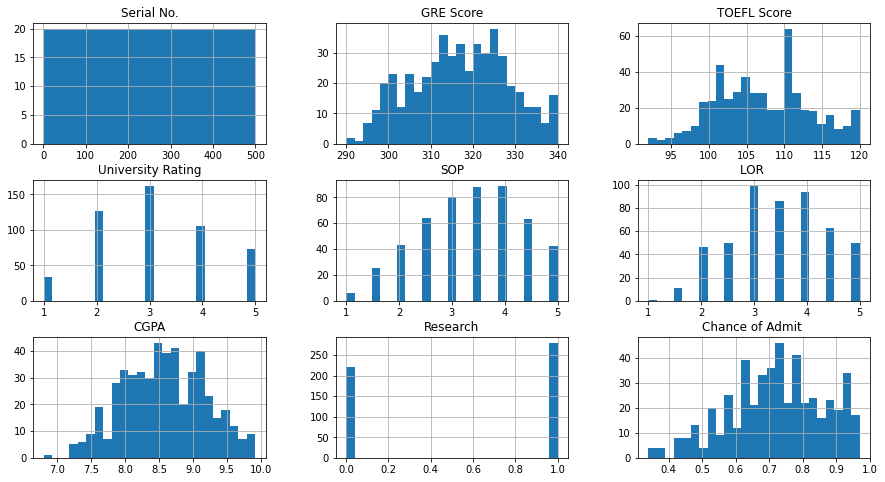

In [9]:
gradm.hist(bins = 25, figsize = (15,8))
plt.show()

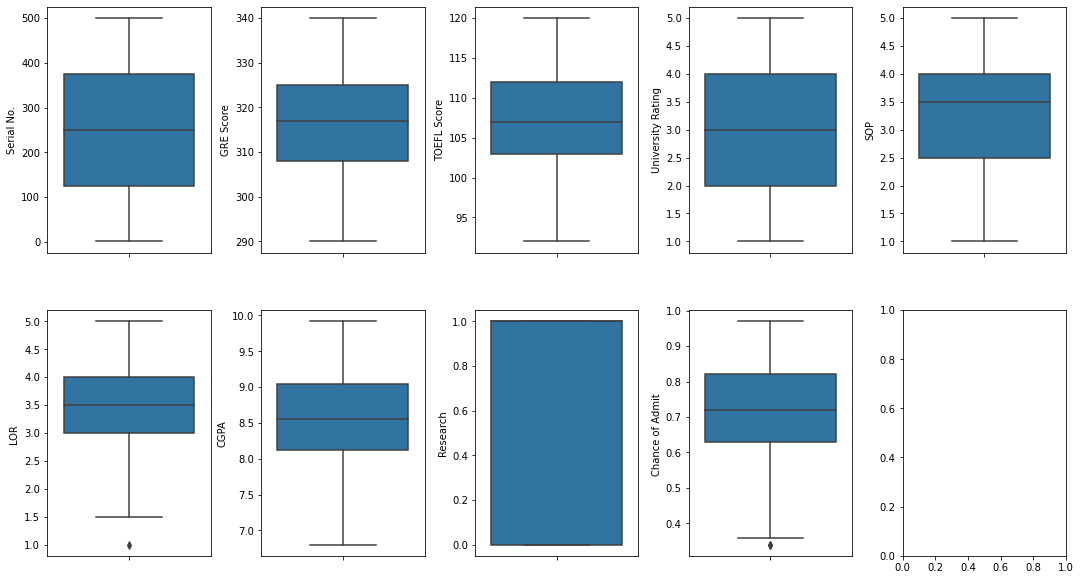

In [10]:
fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (15,8))
index = 0
ax = ax.flatten()

for col, value in gradm.items():
    if col != 'type':
        sns.boxplot(y = col, data = gradm, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

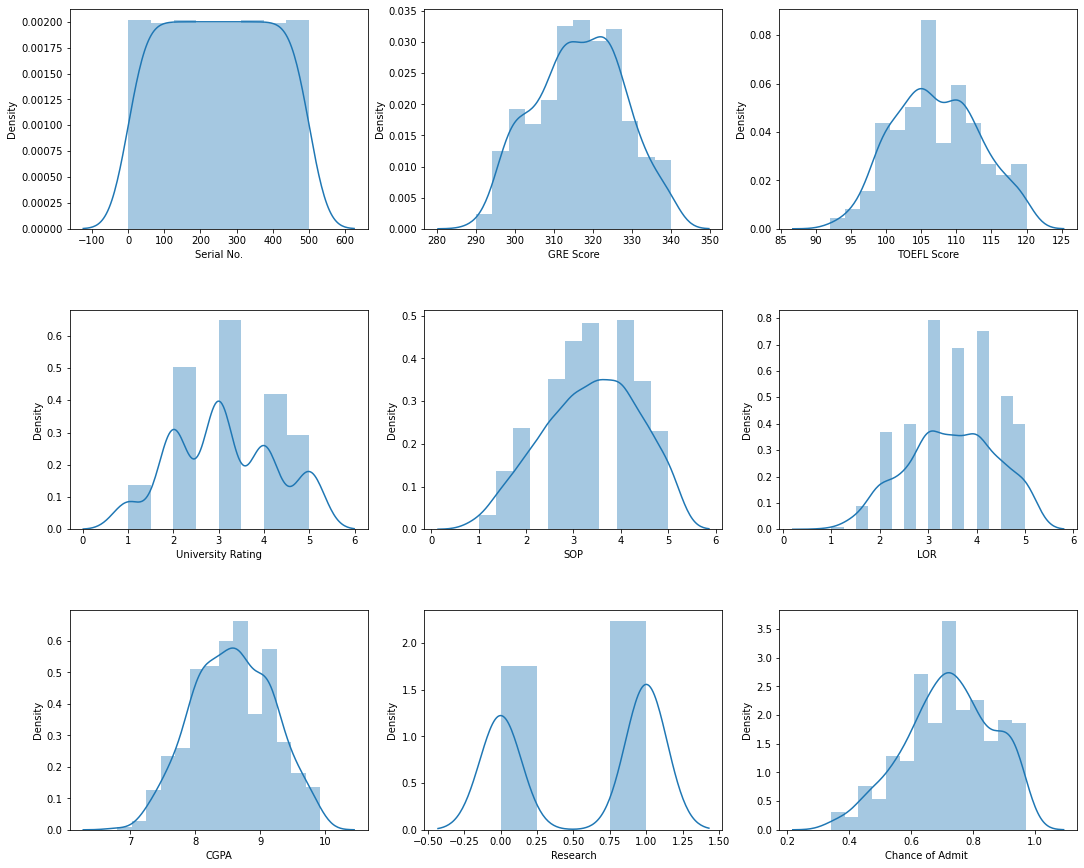

In [11]:
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (15,12))
index = 0
ax = ax.flatten()

for col, value in gradm.items():
    if col != 'type':
        sns.distplot(value, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

* Almost all attributes are Normally distributed.
* There is no Outliers.

### Rename columns

In [12]:
gradm = gradm.rename(columns = {'Serial No.':'no', 'GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score', 
                                'University Rating':'University_Rating', 'SOP':'SOP', 'LOR ':'LOR', 'CGPA':'CGPA', 
                                'Research':'Research', 'Chance of Admit ':'Chance'})

In [13]:
gradm.groupby('University_Rating').mean()

no   GRE_Score  TOEFL_Score       SOP       LOR  \
University_Rating                                                            
1                  281.558824  304.911765   100.205882  1.941176  2.426471   
2                  249.555556  309.134921   103.444444  2.682540  2.956349   
3                  247.574074  315.030864   106.314815  3.308642  3.401235   
4                  275.809524  323.304762   110.961905  4.000000  3.947619   
5                  207.753425  327.890411   113.438356  4.479452  4.404110   

                       CGPA  Research    Chance  
University_Rating                                
1                  7.798529  0.294118  0.562059  
2                  8.177778  0.293651  0.626111  
3                  8.500123  0.537037  0.702901  
4                  8.936667  0.780952  0.801619  
5                  9.278082  0.876712  0.888082

* Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings.
* Now let us analyze the subjects with more than 82% of chance which is the third quartile of the chance data.

In [14]:
gradm[gradm['Chance']>0.82].groupby('Chance').mean()

no   GRE_Score  TOEFL_Score  University_Rating       SOP  \
Chance                                                                     
0.83    309.000000  326.500000   112.750000           3.750000  3.875000   
0.84    255.636364  323.909091   109.636364           3.454545  3.818182   
0.85    229.000000  322.000000   111.500000           3.666667  4.083333   
0.86    246.900000  325.400000   114.400000           4.200000  4.300000   
0.87    273.750000  325.625000   111.125000           4.625000  4.375000   
0.88    127.000000  323.000000   110.750000           5.000000  4.875000   
0.89    269.000000  328.636364   113.545455           4.363636  4.318182   
0.90    186.777778  330.555556   116.111111           4.000000  4.500000   
0.91    267.400000  330.500000   115.000000           4.500000  4.250000   
0.92    226.888889  328.555556   114.888889           4.777778  4.388889   
0.93    268.833333  330.583333   115.916667           4.583333  4.583333   
0.94    160.846154  334.230769   116.692308           4.846154  4.692308   
0.95    288.000000  336.200000   118.000000           4.400000  4.900000   
0.96    239.500000  337.375000   116.000000           4.625000  4.750000   
0.97    144.000000  337.500000   119.750000           4.750000  4.250000   

             LOR      CGPA  Research  
Chance                                
0.83    3.750000  9.032500  0.750000  
0.84    3.772727  9.032727  0.909091  
0.85    4.166667  9.041667  0.833333  
0.86    4.300000  9.124000  0.900000  
0.87    4.187500  9.101250  0.875000  
0.88    4.500000  9.152500  1.000000  
0.89    4.136364  9.270909  0.909091  
0.90    4.111111  9.324444  1.000000  
0.91    4.450000  9.328000  1.000000  
0.92    4.500000  9.417778  1.000000  
0.93    4.250000  9.477500  1.000000  
0.94    4.846154  9.533077  1.000000  
0.95    4.400000  9.540000  1.000000  
0.96    4.687500  9.753750  1.000000  
0.97    4.250000  9.875000  1.000000

* Average GPAs of those with higher level of chance to admit is greater than 9 where the data average is 8.57.
* Average LOR, SOP, GRE and TOEFL grades of those with higher level of chance to admit is greater than the data average.
* Research Shows us 75% Research Experience so there may be chances to Reject the Application in the next we take more than 83%

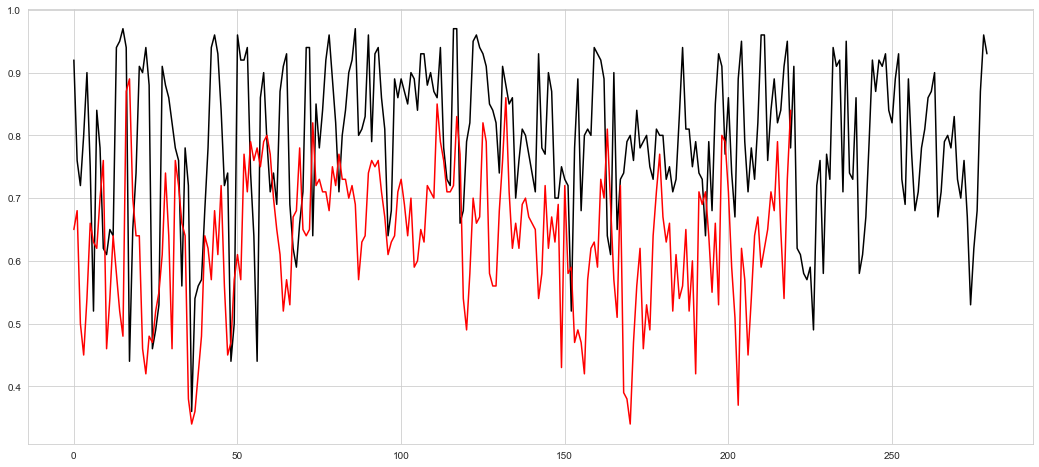

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize = (18,8))
plt.plot(range(len(gradm[gradm['Research'] == 1])), gradm[gradm['Research'] == 1]['Chance'], color = 'black')
plt.plot(range(len(gradm[gradm['Research'] == 0])), gradm[gradm['Research'] == 0]['Chance'], color = 'red')
plt.show()

* The chance of admission depends a great deal on the subjects' research output; 
* hence, research can be a good predictor in predicting the outcome.

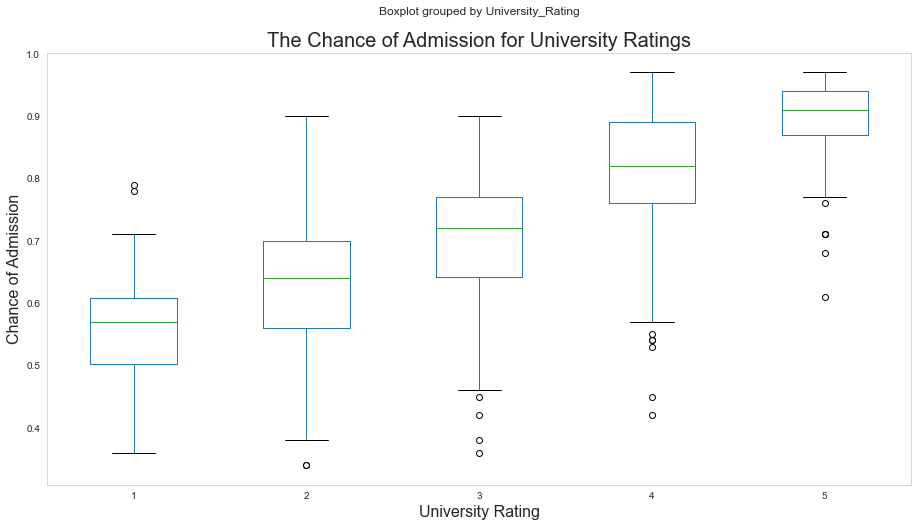

In [16]:
sns.set_style("whitegrid")
gradm.boxplot(column = 'Chance', by = 'University_Rating', grid = False, figsize = (15,8))
plt.title('The Chance of Admission for University Ratings', fontsize = 20)
plt.xlabel('University Rating', fontsize = 16)
plt.ylabel('Chance of Admission', fontsize = 16)
plt.show()

* As it can be seen from the boxplot chart, chance of admission is higher within the applicants of lower rated (5) universities.

In [17]:
grp_UR = gradm.groupby(by = ['University_Rating'])["Chance"].mean().reset_index()
grp_UR['Chance'] = round(grp_UR['Chance']*100, 2)
grp_UR.sort_values(by = ['Chance'], inplace = True)

data = [go.Bar(x = grp_UR['University_Rating'], y = grp_UR['Chance'], text = grp_UR['Chance'], textposition = 'inside',
               marker = dict(line = {'color': 'black', 'width': 0.5}))]

layout = go.Layout(title = dict(text = 'Percentage Chance Of Admission By University Rating', font = {'size': 20}, x = 0.5, 
                                y = 0.88, xanchor = 'center', yanchor = 'top'), xaxis = dict(title = 'University Rating', 
                                titlefont = {'size': 16}), yaxis = dict(title = 'Percentage Chance Of Admission', 
                                titlefont = {'size': 16}, range = [0, 100]))

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [18]:
grp_LOR = gradm.groupby(by = ['LOR'])["Chance"].mean().reset_index()
grp_LOR['Chance'] = round(grp_LOR['Chance']*100, 2)
grp_LOR.sort_values(by = ['Chance'], inplace = True)

data = [go.Bar(x = grp_LOR['LOR'], y = grp_LOR['Chance'], text = grp_LOR['Chance'], textposition = 'inside',
               marker = dict(line = {'color': 'black', 'width': 0.5}))]

layout = go.Layout(title = dict(text = 'Percentage Chance Of Admission By Letter Of Recommendation', font = {'size': 20},
                                x = 0.5, y = 0.88, xanchor = 'center', yanchor = 'top'), xaxis = dict(title = 'LOR', 
                                titlefont = {'size': 16}), yaxis = dict(title = 'Percentage Chance Of Admission', 
                                titlefont = {'size': 16}, range = [0, 100]))

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [19]:
grp_SOP = gradm.groupby(by = ['SOP'])["Chance"].mean().reset_index()
grp_SOP['Chance'] = round(grp_SOP['Chance']*100, 2)
grp_SOP.sort_values(by = ['Chance'], inplace = True)

data = [go.Bar(x = grp_SOP['SOP'], y = grp_SOP['Chance'], text = grp_SOP['Chance'], textposition = 'inside',
               marker = dict(line = {'color': 'black', 'width': 0.5}))]

layout = go.Layout(title = dict(text = 'Percentage Chance Of Admission By SOP', font = {'size': 20}, x = 0.5, y = 0.88, 
                                xanchor = 'center', yanchor = 'top'), xaxis = dict(title = 'SOP', titlefont = {'size': 16}), 
                   yaxis = dict(title = 'Percentage Chance Of Admission', titlefont = {'size': 16}, range = [0, 100]))

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [20]:
grp_Res = gradm.groupby(by = ['Research'])["Chance"].mean().reset_index()
grp_Res['Chance'] = round(grp_Res['Chance']*100, 2)
grp_Res.sort_values(by = ['Chance'], inplace = True)

data = [go.Pie(values = grp_Res['Chance'], )]

layout = go.Layout(title = dict(text = 'Percentage Chance Of Admission By Research', font = {'size': 20}, x = 0.5, y = 0.88, 
                                xanchor = 'center', yanchor = 'top'))

fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Correlation

In [21]:
data = [go.Scatter(x = gradm['GRE_Score'], y = gradm['Chance']*100, mode = 'markers', 
                   marker = dict(symbol = 'circle', size = 16, color = gradm['SOP'], showscale = True))]

layout = go.Layout(title = dict(text = 'GRE Score Vs Chance Of Admit - SOP', x = 0.5, y = 0.88, font = {'size': 20}),
                   xaxis = dict(title = 'GRE Score', titlefont = {'size': 16}), yaxis = dict(title = 'Chance Of Admit', 
                                titlefont = {'size': 16}), template = 'plotly_dark')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [22]:
data = [go.Scatter(x = gradm['CGPA'], y = gradm['Chance']*100, mode = 'markers', 
                   marker = dict(symbol = 'circle', size = 16, color = gradm['University_Rating'], showscale = True))]

layout = go.Layout(title = dict(text = 'CGPA Vs Chance Of Admit - University Rating', x = 0.5, y = 0.88, font = {'size': 20}),
                   xaxis = dict(title = 'CGPA', titlefont = {'size': 16}), yaxis = dict(title = 'Chance Of Admit', 
                                titlefont = {'size': 16}), template = 'plotly_dark')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [23]:
data = [go.Scatter(x = gradm['TOEFL_Score'], y = gradm['Chance']*100, mode = 'markers', 
                   marker = dict(symbol = 'circle', size = 16, color = gradm['LOR'], showscale = True))]

layout = go.Layout(title = dict(text = 'TOEFL Vs Chance Of Admit - LOR', x = 0.5, y = 0.88, font = {'size': 20}),
                   xaxis = dict(title = 'TOEFL', titlefont = {'size': 16}), yaxis = dict(title = 'Chance Of Admit', 
                                titlefont = {'size': 16}), template = 'plotly_dark')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [24]:
gradm.drop(['no'], axis = 1, inplace = True)

In [25]:
data = []
for i in gradm.columns[:-1]:
    data .append(go.Box(y = gradm[i], marker = dict(line = {'color': 'black', 'width': 0.5}, opacity = 0.5), name = str(i), 
                        boxpoints = 'outliers', notched = True))

layout = go.Layout(title = dict(text = 'Checking the range and scale of all the features.', x = 0.5, y = 0.88))

fig = go.Figure(data = data, layout = layout)
iplot(fig)

<AxesSubplot:title={'center':'Correlation of all the Columns'}>

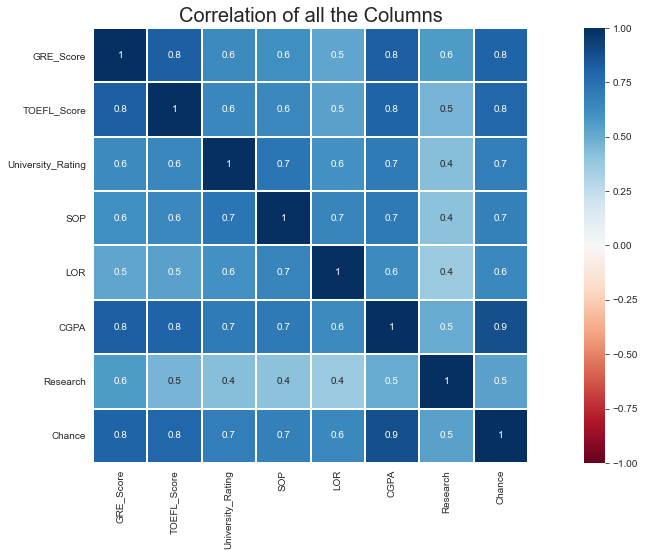

In [26]:
plt.figure(figsize = (20,8))
plt.title('Correlation of all the Columns', fontsize = 20)
sns.heatmap(gradm.corr(), annot = True, vmin = -1, vmax = 1, center = 0, fmt = '.1g', linewidths = 1, linecolor = 'white', 
            square = True, cmap ='RdBu')

## Pre - Processing Data

In [27]:
X = gradm.drop(columns = ['Chance'])
y = gradm['Chance']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(350, 7)
(350,)
(150, 7)
(150,)


## Normalization 

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

* MIN - MAX Scaler its Better use always the Scaler methods to improve the Accuracy

## Modeling
### 1. Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [32]:
lr.coef_

array([0.02437518, 0.02074582, 0.003574  , 0.00151171, 0.01397131,
       0.06878132, 0.01029245])

In [33]:
print(lr.intercept_)

0.7240857142857143


In [34]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns = ['Coefficient'])
coeff_df

Coefficient
GRE_Score             0.024375
TOEFL_Score           0.020746
University_Rating     0.003574
SOP                   0.001512
LOR                   0.013971
CGPA                  0.068781
Research              0.010292

Text(0, 0.5, 'Predicted Y')

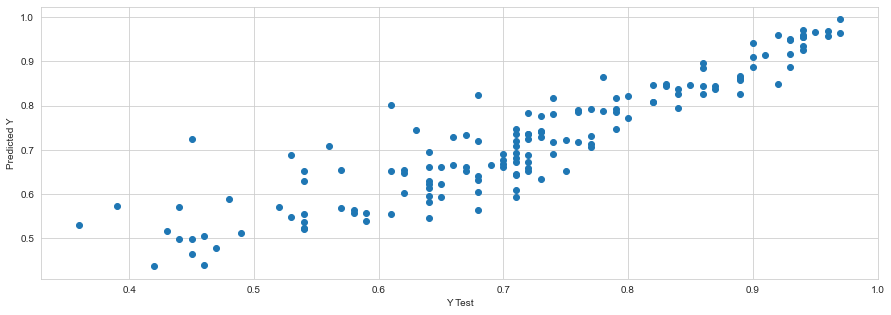

In [35]:
plt.figure(figsize = (15,5))
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

plt.scatter(y_test, y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y') 

In [36]:
data = [go.Scatter(x = y_test, y = y_pred_test, mode = 'markers', marker = dict(symbol = 'circle', size = 16, 
                                                                                 color = 'skyblue'))]

layout = go.Layout(title = dict(text = 'Linear Regression - Actual Values vs Predicted Values', x = 0.5, y = 0.88, 
                                font = {'size': 20}), xaxis = dict(title = 'Actual Value', titlefont = {'size': 16}, 
                                range = [0, 1]), yaxis = dict(title = 'Predicted Value', titlefont = {'size': 16}, 
                                range = [0, 1]), template = 'plotly_dark')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

Text(0.5, 0, 'SalePrice')

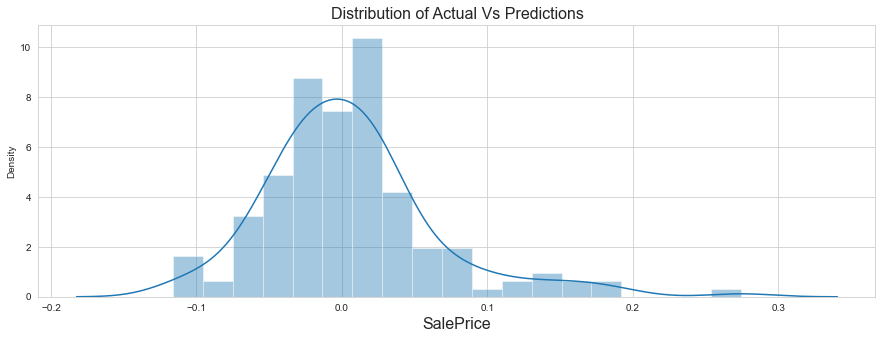

In [37]:
plt.figure(figsize = (15,5))
sns.distplot(y_pred_test - y_test)
plt.title("Distribution of Actual Vs Predictions", fontsize = 16)
plt.xlabel("SalePrice", fontsize = 16)

### Compare the Actual Values and Predicted Values using a Plot

Text(0.5, 1.0, 'Actual(Blue) vs. predicted (red)')

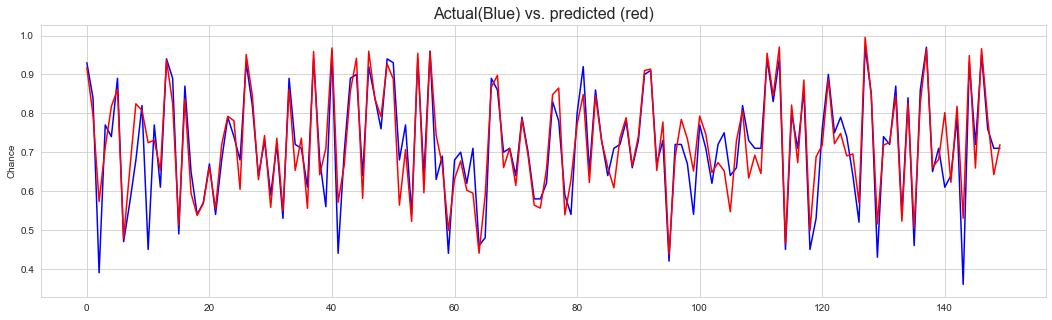

In [38]:
list_values = [i for i in range(0, len(y_test))]
plt.figure(figsize = (18,5))
sns.lineplot(list_values, y_test, color = 'blue')
sns.lineplot(list_values, y_pred_test, color = 'red')
plt.title('Actual(Blue) vs. predicted (red)', fontsize = 16)

In [39]:
from sklearn import metrics
print('R Sqaure                      :', metrics.r2_score(y_test, y_pred_test)*100)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

R Sqaure                      : 82.5630603991949
Mean Square Error (MSE)       : 0.0036342178012511044
Mean Absolute Error (MAE)     : 0.042673413772238315
Root mean Square Error (RMSE) : 0.06028447396511895


In [40]:
## Adujusted R square = 1 - ((n-1)/(n-k-1))*(1- r square)
# n = sample size
# k = no of independent variables
n = x_test.shape[0]
k = x_test.shape[1]

print('Adujusted R square :', 1 - ((n-1)/(n-k-1))*(1- (metrics.r2_score(y_test, y_pred_test)*100)))

Adujusted R square : 86.58377464422563


## Checking for P - value using STATSMODELS

In [41]:
import statsmodels.api as sm
x_train_sm  = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_sm).fit()
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Chance   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 31 Aug 2021   Prob (F-statistic):          1.80e-122
Time:                        15:23:21   Log-Likelihood:                 491.18
No. Observations:                 350   AIC:                            -966.4
Df Residuals:                     342   BIC:                            -935.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7241      0.003    225.171      0.000       0.718       0.730
x1             0.0244      0.007      3.563      0.000       0.011       0.038
x2             0.0207      0.006      3.449      0.001       0.009       0.033
x3             0.0036      0.005      0.679      0.498      -0.007       0.014
x4             0.0015      0.005      0.276      0.783      -0.009       0.012
x5             0.0140      0.005      3.080      0.002       0.005       0.023
x6             0.0688      0.007      9.866      0.000       0.055       0.082
x7             0.0103      0.004      2.604      0.010       0.003       0.018
==============================================================================
Omnibus:                       79.176   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.143
Skew:                          -1.132   Prob(JB):                     2.07e-39
Kurtosis:                       5.662   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variance Inflation Factor

* Variance inflation factor (VIF) for an explanatory variable is given 1/(1-R^2 ).
* Here, we take that particular X as response variable and all other explanatory variables as independent variables. 
* So, we run a regression between one of those explanatory variables with remaining explanatory variables.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"]   = X.columns
vif.round(2)

VIF Factor           features
0     1308.06          GRE_Score
1     1215.95        TOEFL_Score
2       20.93  University_Rating
3       35.27                SOP
4       30.91                LOR
5      950.82               CGPA
6        2.87           Research

* The thumb rule is VIF greater than 10 should be removed.

## Feature Importance

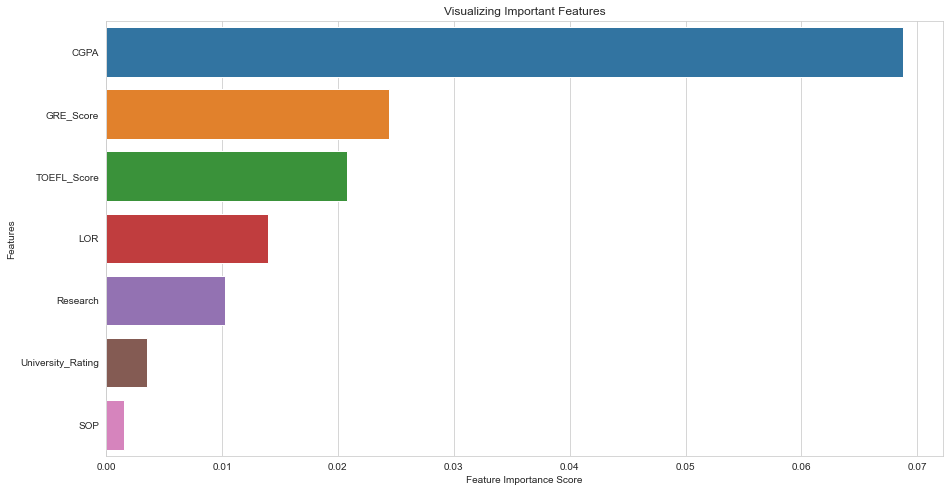

In [43]:
importance = lr.coef_
feature_imp = pd.Series(importance, index = X.columns[:7]).sort_values(ascending = False)
feature_imp
plt.figure(figsize = (15, 8))
# Visualize the Importance Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 2. Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
y_pred_rfr_train = regressor.predict(x_train)
y_pred_rfr_test  = regressor.predict(x_test)

In [46]:
print('R Sqaure                      :', metrics.r2_score(y_test, y_pred_rfr_test)*100)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_rfr_test))
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, y_pred_rfr_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr_test)))

R Sqaure                      : 81.39429634175674
Mean Square Error (MSE)       : 0.003877812333333333
Mean Absolute Error (MAE)     : 0.043895333333333335
Root mean Square Error (RMSE) : 0.06227208309775202


### Compare the Actual Values and Predicted Values using a Plot

Text(0.5, 1.0, 'Actual(Blue) vs. predicted (red)')

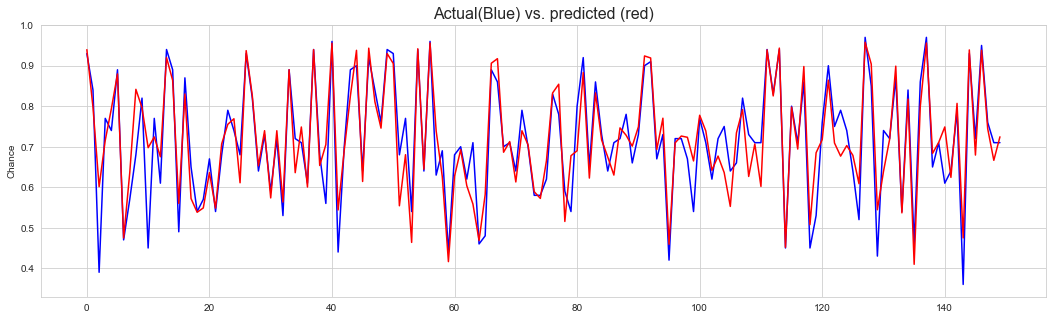

In [47]:
list_values = [i for i in range(0, len(y_test))]
plt.figure(figsize = (18,5))
sns.lineplot(list_values, y_test, color = 'blue')
sns.lineplot(list_values, y_pred_rfr_test, color = 'red')
plt.title('Actual(Blue) vs. predicted (red)', fontsize = 16)

* Thus we can observe, that the actual prices and the predicted prices are almost the same, as the two graphs overlap each other. Thus, or model has performed extremely well..!!!

In [48]:
data = [go.Scatter(x = y_test, y = y_pred_rfr_test, mode = 'markers', marker = dict(symbol = 'circle', size = 16, 
                                                                                 color = 'skyblue'))]

layout = go.Layout(title = dict(text = 'Random Forest Regressor - Actual Values vs Predicted Values', x = 0.5, y = 0.88, 
                                font = {'size': 20}), xaxis = dict(title = 'Actual Value', titlefont = {'size': 16}, 
                                range = [0, 1]), yaxis = dict(title = 'Predicted Value', titlefont = {'size': 16}, 
                                range = [0, 1]), template = 'plotly_dark')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Feature Importance

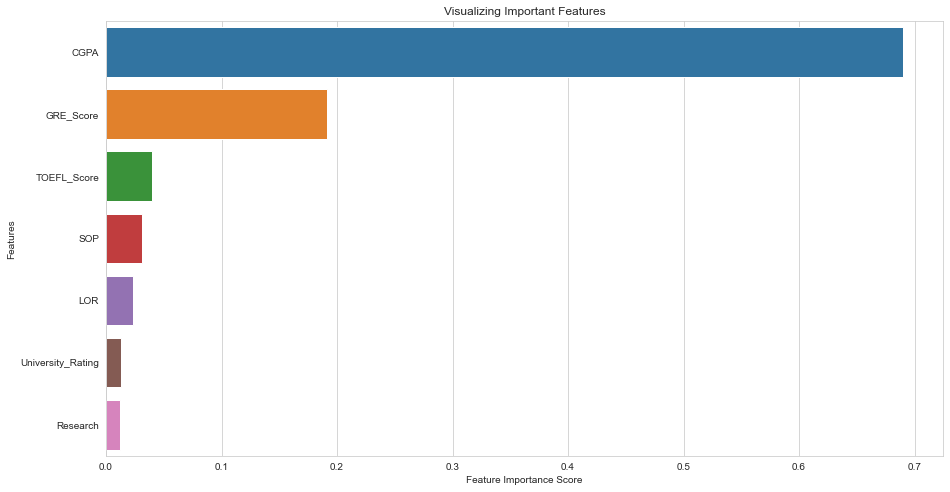

In [49]:
importance = regressor.feature_importances_
feature_imp = pd.Series(importance, index = X.columns[:7]).sort_values(ascending = False)
feature_imp
plt.figure(figsize = (15, 8))
# Visualize the Importance Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 3. Support Vector Regression

In [50]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [51]:
y_pred_svr_train = svr.predict(x_train)
y_pred_svr_test  = svr.predict(x_test)

In [52]:
print('R Sqaure                      :', metrics.r2_score(y_test, y_pred_svr_test)*100)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_svr_test))
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, y_pred_svr_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr_test)))

R Sqaure                      : 79.9438494389358
Mean Square Error (MSE)       : 0.0041801153793195696
Mean Absolute Error (MAE)     : 0.04847421753473289
Root mean Square Error (RMSE) : 0.06465381179265124


### Compare the Actual Values and Predicted Values using a Plot

Text(0.5, 1.0, 'Actual(Blue) vs. predicted (red)')

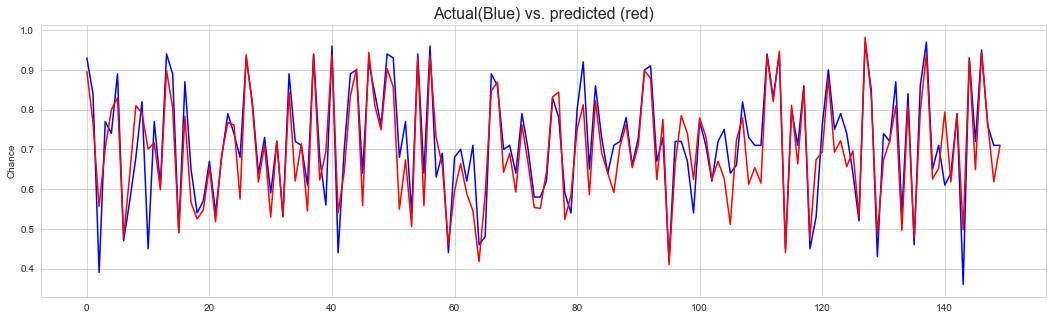

In [53]:
list_values = [i for i in range(0, len(y_test))]
plt.figure(figsize = (18,5))
sns.lineplot(list_values, y_test, color = 'blue')
sns.lineplot(list_values, y_pred_svr_test, color = 'red')
plt.title('Actual(Blue) vs. predicted (red)', fontsize = 16)

In [54]:
data = [go.Scatter(x = y_test, y = y_pred_svr_test, mode = 'markers', marker = dict(symbol = 'circle', size = 16, 
                                                                                 color = 'skyblue'))]

layout = go.Layout(title = dict(text = 'Support Vector Regression - Actual Values vs Predicted Values', x = 0.5, y = 0.88, 
                                font = {'size': 20}), xaxis = dict(title = 'Actual Value', titlefont = {'size': 16}, 
                                range = [0, 1]), yaxis = dict(title = 'Predicted Value', titlefont = {'size': 16}, 
                                range = [0, 1]), template = 'plotly_dark')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

### 4. XGB Regressor

In [55]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test  = xgb.predict(x_test)

In [57]:
print('R Sqaure                      :', metrics.r2_score(y_test, y_pred_xgb_test)*100)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_xgb_test))
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, y_pred_xgb_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_test)))

R Sqaure                      : 79.09287791059607
Mean Square Error (MSE)       : 0.004357475394749531
Mean Absolute Error (MAE)     : 0.04787291810512542
Root mean Square Error (RMSE) : 0.06601117628666778


### Compare the Actual Values and Predicted Values using a Plot

Text(0.5, 1.0, 'Actual(Blue) vs. predicted (red)')

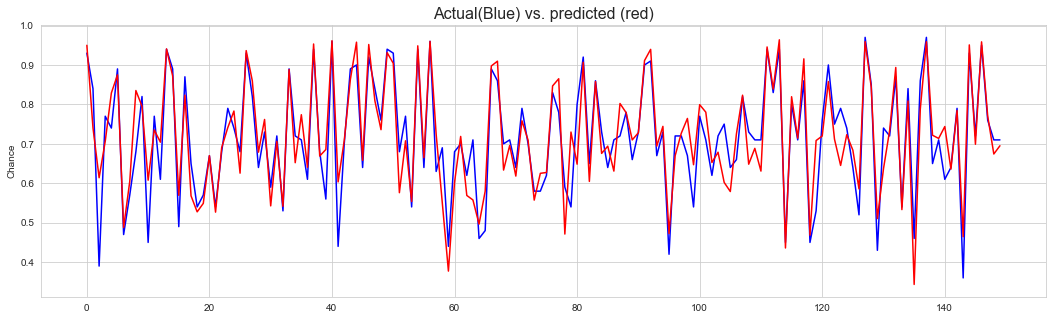

In [58]:
list_values = [i for i in range(0, len(y_test))]
plt.figure(figsize = (18,5))
sns.lineplot(list_values, y_test, color = 'blue')
sns.lineplot(list_values, y_pred_xgb_test, color = 'red')
plt.title('Actual(Blue) vs. predicted (red)', fontsize = 16)

In [59]:
data = [go.Scatter(x = y_test, y = y_pred_xgb_test, mode = 'markers', marker = dict(symbol = 'circle', size = 16, 
                                                                                 color = 'skyblue'))]

layout = go.Layout(title = dict(text = 'XGB Regressor - Actual Values vs Predicted Values', x = 0.5, y = 0.88, 
                                font = {'size': 20}), xaxis = dict(title = 'Actual Value', titlefont = {'size': 16}, 
                                range = [0, 1]), yaxis = dict(title = 'Predicted Value', titlefont = {'size': 16}, 
                                range = [0, 1]), template = 'plotly_dark')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

### 5. Extra Trees Regressor

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

ExtraTreesRegressor()

In [61]:
y_pred_etr_train = etr.predict(x_train)
y_pred_etr_test  = etr.predict(x_test)

In [62]:
print('R Sqaure                      :', metrics.r2_score(y_test, y_pred_etr_test)*100)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_etr_test))
print('Mean Absolute Error (MAE)     :', metrics.mean_absolute_error(y_test, y_pred_etr_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_etr_test)))

R Sqaure                      : 80.58693253642633
Mean Square Error (MSE)       : 0.004046083600000002
Mean Absolute Error (MAE)     : 0.04460666666666669
Root mean Square Error (RMSE) : 0.06360883271999261


### Compare the Actual Values and Predicted Values using a Plot

Text(0.5, 1.0, 'Actual(Blue) vs. predicted (red)')

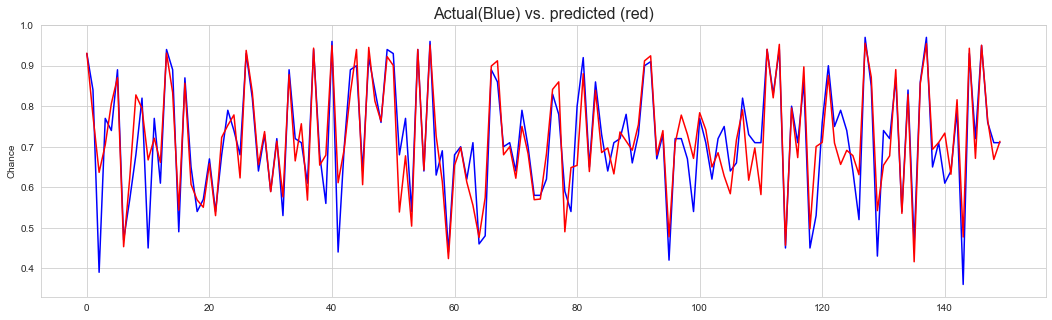

In [63]:
list_values = [i for i in range(0, len(y_test))]
plt.figure(figsize = (18,5))
sns.lineplot(list_values, y_test, color = 'blue')
sns.lineplot(list_values, y_pred_etr_test, color = 'red')
plt.title('Actual(Blue) vs. predicted (red)', fontsize = 16)

In [64]:
data = [go.Scatter(x = y_test, y = y_pred_etr_test, mode = 'markers', marker = dict(symbol = 'circle', size = 16, 
                                                                                 color = 'skyblue'))]

layout = go.Layout(title = dict(text = 'Extra Trees Regressor - Actual Values vs Predicted Values', x = 0.5, y = 0.88, 
                                font = {'size': 20}), xaxis = dict(title = 'Actual Value', titlefont = {'size': 16}, 
                                range = [0, 1]), yaxis = dict(title = 'Predicted Value', titlefont = {'size': 16}, 
                                range = [0, 1]), template = 'plotly_dark')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Conclusion :

In this notebook, machine learning models were performed to predict the opportunity of a student to get admitted to a master’s program. The machine learning models included are multiple linear regression, Random Forest Regressor, Support Vector Regression , XGB Regressor and Extra Trees Regressor. 

Experiments show that the multiple linear regression model surpasses other models.

As for the future work, more models can be conducted on more datasetsto learn the model that gives the best performance.

## Future Scope :

From the proposed work we are able to identify only chance to get seat and we are not able to identify which university we are obtaining. So, in future we can develop a representation, which gives us a list of universities in which we can obtain admission.